In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv
scv.settings.verbosity = 0

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('/data/nelkazwi/code/UniTVelo-ATAC/crak-velo')
from supplement.fitting_genes_regions import compute_alpha_atac, region_unspliced_kinetics
from pl.pl import  region_kinetic_plot,scatter_plot
from supplement.eval_utils import KNN_eval

In [3]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [20]:
path_result = '/data/nelkazwi/code/UniTVelo-ATAC/notebooks/data/10X_mouse_brain_dataset/'
adata = sc.read_h5ad(path_result+'adata_rna_fit.h5ad')
adata_atac = sc.read_h5ad(path_result+'adata_atac_fit.h5ad')
adata_unv = sc.read_h5ad(path_result+'adata_unitvelo.h5ad')
B = np.loadtxt(path_result+'B.txt', delimiter=',')
key_celltype = 'celltype'

adata_mv = sc.read_h5ad(path_result+'adata_multivelo.h5ad')
key_celltype_mv = 'celltype'

  0%|          | 0/3365 [00:00<?, ?cells/s]

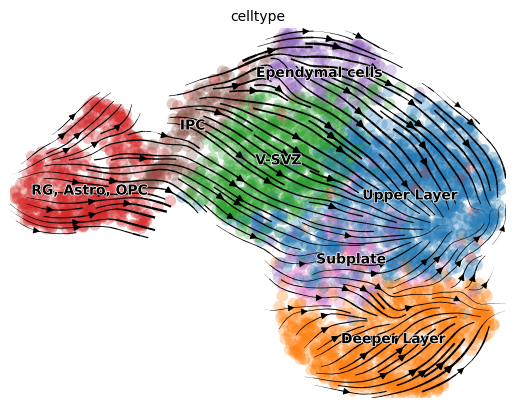

In [5]:
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype'], dpi=100,
                                  color_map='gnuplot')

  0%|          | 0/3365 [00:00<?, ?cells/s]

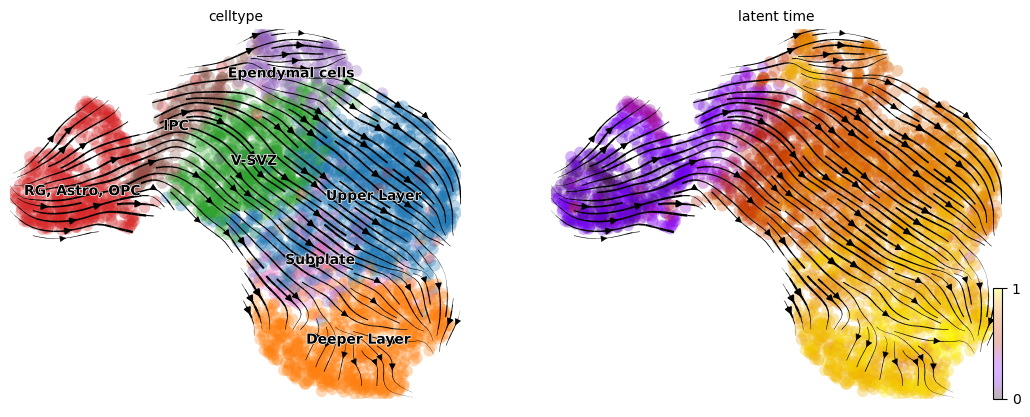

In [6]:
scv.tl.velocity_graph(adata_unv)
scv.pl.velocity_embedding_stream(adata_unv, color=['celltype', "latent_time"], dpi=100, color_map='gnuplot')

In [7]:
alpha_atac, adata = compute_alpha_atac(adata, adata_atac, B)


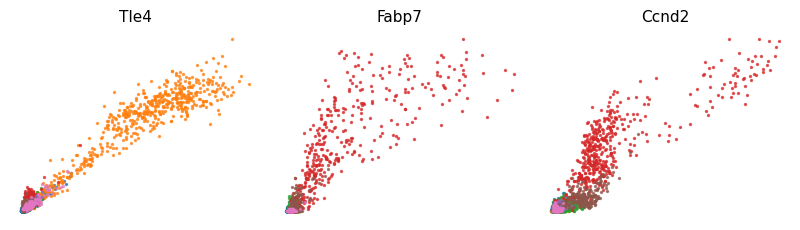

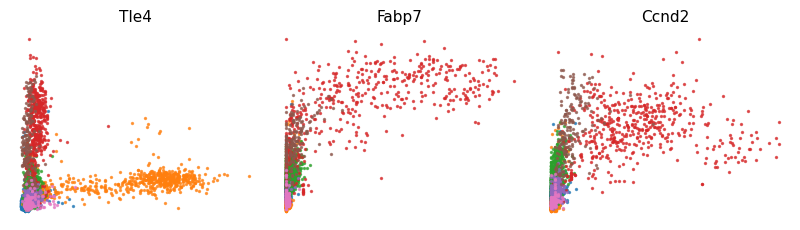

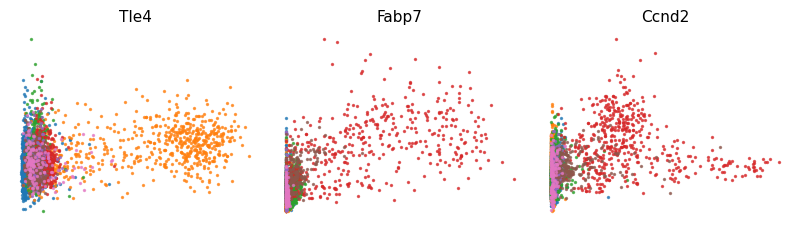

In [8]:
gene_list = ['Tle4','Fabp7','Ccnd2']


scatter_plot(adata, gene_list, color_by=key_celltype, by='us',  axis_on=False, frame_on=False)



scatter_plot(adata, gene_list, color_by=key_celltype, by='cu',  axis_on=False, frame_on=False)


scatter_plot(adata_mv, genes=gene_list, color_by=key_celltype_mv, by='cu', axis_on=False, frame_on=False)

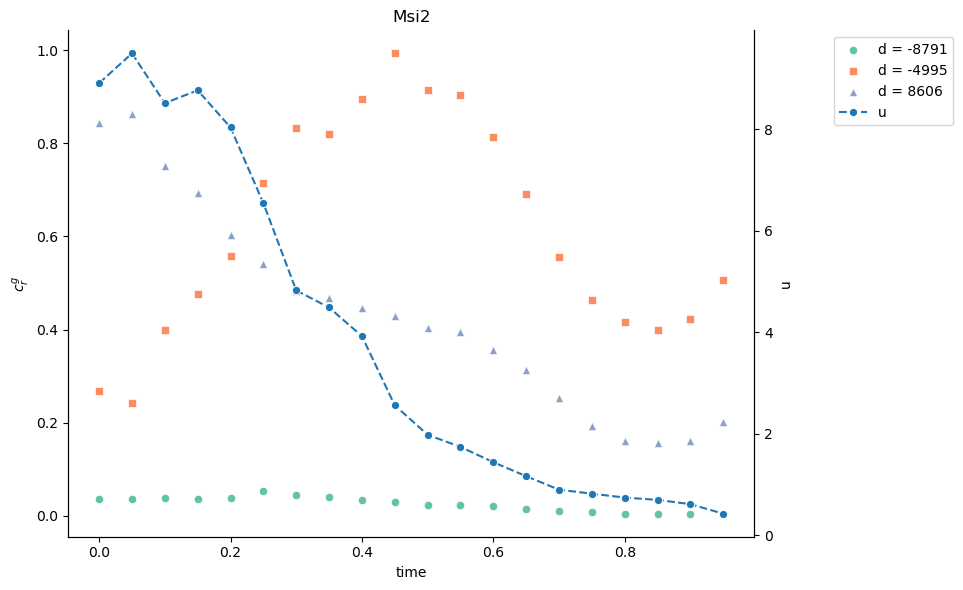

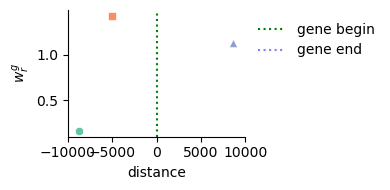

In [9]:
gene_name = 'Msi2'
time, c, u_avg = region_unspliced_kinetics(adata, adata_atac, B, gene_name, interval = 0.05)
region_kinetic_plot(adata,adata_atac,gene_name, time, c, u_avg,B)

In [10]:
acc, acc_mv, acc_su = KNN_eval (adata, adata_mv, key_celltype, key_celltype_mv)

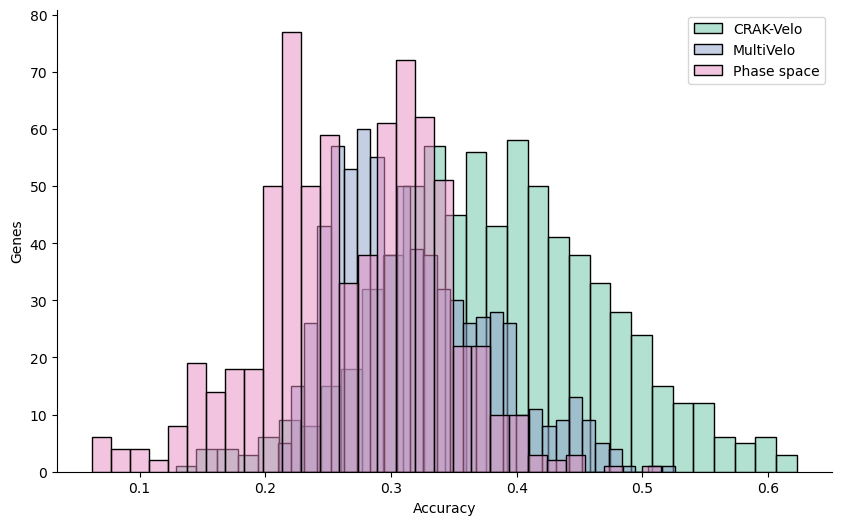

In [12]:
bins=30
alpha=0.5

colors = plt.get_cmap('Set2').colors
labels = ['CRAK-Velo', 'MultiVelo', 'Phase space']#
plt.figure(figsize=(10, 6))
n = 0
sns.histplot(acc, bins=bins, color=colors[n], label=labels[0], alpha=alpha, kde=False)
sns.histplot(acc_mv, bins=bins, color=colors[n+2], label=labels[1], alpha=alpha, kde=False)
plot = sns.histplot(acc_su, bins=bins, color=colors[n+3], label=labels[2], alpha=alpha, kde=False)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plt.ylabel("Genes")
plt.xlabel("Accuracy")
plt.legend()


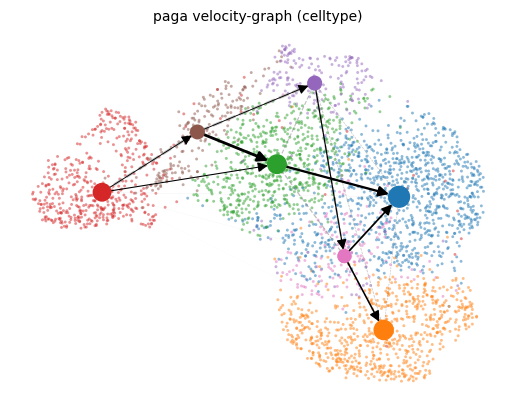

In [13]:
scv.tl.paga(adata, groups='celltype', vkey='velocity',use_time_prior= 'latent_time', minimum_spanning_tree=False) 
scv.pl.paga(adata, basis='umap',threshold=0, legend_loc=None)

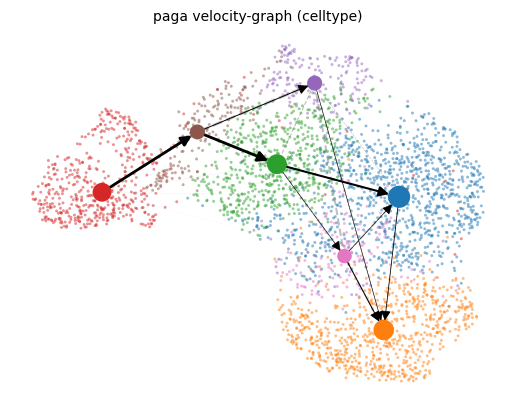

In [14]:
scv.tl.paga(adata_unv, groups='celltype', vkey='velocity',use_time_prior= 'latent_time', minimum_spanning_tree=False) 
scv.pl.paga(adata_unv, basis='umap',threshold=0, legend_loc=None)

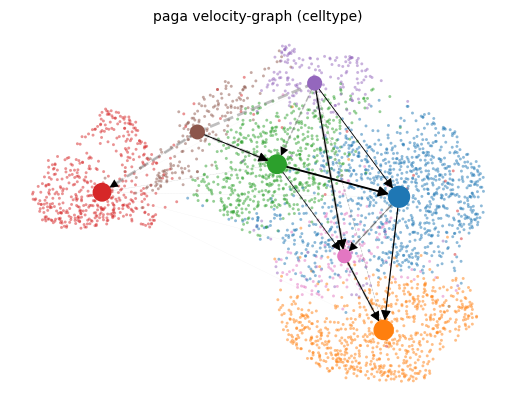

In [18]:
scv.tl.paga(adata_mv, groups='celltype', vkey='velo_s_norm',use_time_prior= 'latent_time', minimum_spanning_tree=False) 
scv.pl.paga(adata_mv, basis='umap',threshold=0, legend_loc=None)